# The Spark Foundation - GRIP 
# Batch April 2024
# Name : Jaiadithya A
# Domain - Data Science and Business Analytics
# Task 1 - Regression Model

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This is going to be a simple regression, predicting the scores based on the hours studied by the student.

In [3]:
import matplotlib.pyplot as plt
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data obtained successfully")

Data obtained successfully


Now, lets look at the top 5 records to get a better understanding of the data.

In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Next, let's plot the given data on a graph for better representation.

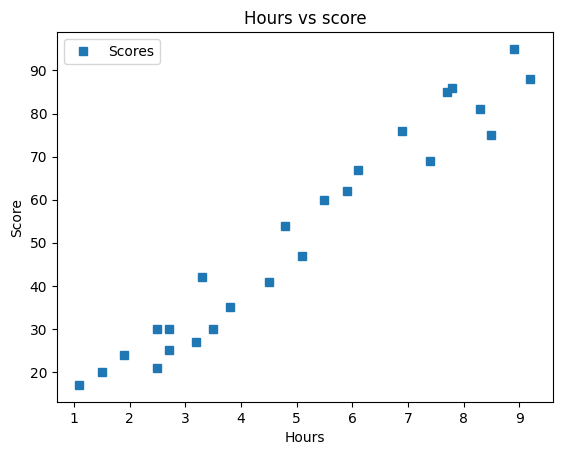

In [5]:
data.plot(x='Hours', y='Scores', style = 's')
plt.title('Hours vs score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

We can that the score obtained is directly proportional to the hours spent studying.

# Let's Start running a regression to this data.

In [6]:
x = data.iloc[:, :-1]
print(x.shape)
print(type(x))
print(x.head())
y = data.iloc[:, 1]
print(y.shape)
print(y[5:9])

(25, 1)
<class 'pandas.core.frame.DataFrame'>
   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
(25,)
5    20
6    88
7    60
8    81
Name: Scores, dtype: int64


Now, the data is going to be split into training and test set. The data is then used to train the model using the LinearRegression model imported from sklearn.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("Model fitting completed")

Model fitting completed


The model has been trained. 
As the prediction usually happens as 
Y_hat = m * X + b
where m and b are the trained parameters.

In [8]:
m = model.coef_
b = model.intercept_
print("m = ", m, "  b = ", b)

m =  [9.91065648]   b =  2.018160041434662


Next, the visualise the regression learnt by the model.

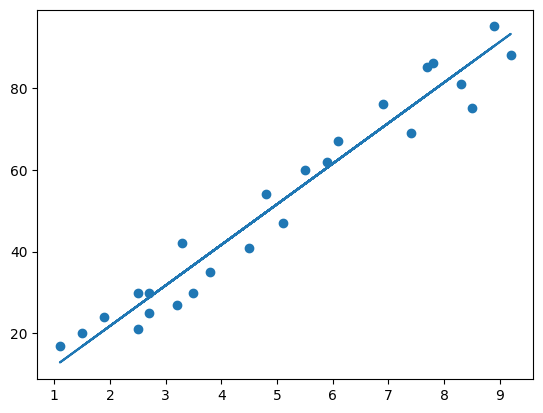

In [9]:
line = m*x + b
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

After this, we shall predict some scores for the hours studied in the x_test data set and verify the performance of the model.

In [10]:
y_pred = model.predict(x_test)

Look at the difference in the actual and predicted values. 

In [11]:
df = pd.DataFrame({'Actual':y_test, "Predicted":y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Next, we have to evaluate the model on how well it has fitted.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("The error in RMSE : ", mean_squared_error(y_test, y_pred, squared = False))
print("The error in MAE : ", mean_absolute_error(y_test, y_pred))

The error in RMSE :  4.647447612100373
The error in MAE :  4.183859899002982


The model as a Root Mean Squared Error of around 4.65.

Finally, for the prediction of the score if studied 9.25 hours each day.

In [14]:
ques = [[9.25]]
ques_df = pd.DataFrame(ques, columns=['Hours'])
pred = model.predict(ques_df)
print("The expected Score for studying 9.25 hours each day : ", pred)

The expected Score for studying 9.25 hours each day :  [93.69173249]


From the regressor model, we can infer the expected score to be 93.7